? in native-country: 0
? in occupation: 0
? in workclass: 0
       age         workclass  fnlwgt   education  education-num  \
0       39         State-gov   77516   Bachelors             13   
1       50  Self-emp-not-inc   83311   Bachelors             13   
2       38           Private  215646     HS-grad              9   
3       53           Private  234721        11th              7   
4       28           Private  338409   Bachelors             13   
...    ...               ...     ...         ...            ...   
32556   27           Private  257302  Assoc-acdm             12   
32557   40           Private  154374     HS-grad              9   
32558   58           Private  151910     HS-grad              9   
32559   22           Private  201490     HS-grad              9   
32560   52      Self-emp-inc  287927     HS-grad              9   

           marital-status         occupation   relationship   race     sex  \
0           Never-married       Adm-clerical  Not-in-fami

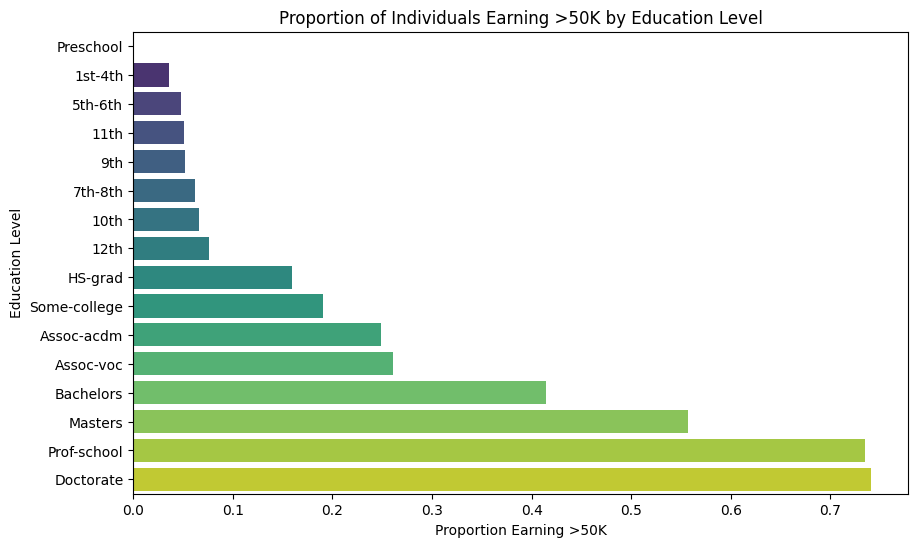

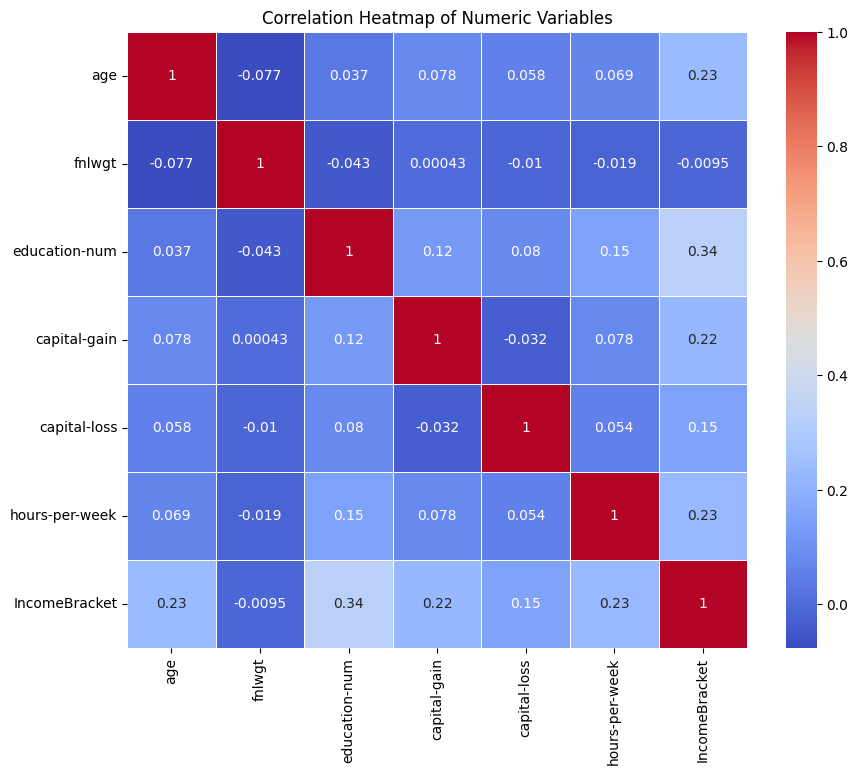

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Load the dataset with the specified columns
data = pd.read_csv("C:\\Users\\Yash Puri\\Downloads\\adult.csv", na_values=" ?", skipinitialspace=True)


edit_cols = ['native-country','occupation','workclass']
# Replace ? with Unknown
for col in edit_cols:
    data.loc[data[col] == '?', col] = 'unknown'

# Check if ? is present
for col in edit_cols:
    print(f"? in {col}: {data[(data[col] == '?')].any().sum()}")

print(data)

# 2. Encode categorical columns using pd.get_dummies (One-Hot Encoding)
categorical_columns = ['workclass', 'education', 'marital_status', 'occupation', 
                       'relationship', 'race', 'sex', 'native_country', 'income']

# Create a binary IncomeBracket column
data['IncomeBracket'] = data['income'].apply(lambda x: 1 if x == '>50K' else 0)

# Combine Workclass and Occupation into a new column
data['Work_Occupation'] = data['workclass'] + '' + data['occupation']

# 3. Calculate the average age per workclass
average_age_per_workclass = data.groupby('workclass')['age'].mean()

# 4. Calculate the proportion of individuals earning more than 50K per education level
proportion_earning_50K = data[data['IncomeBracket'] == 1].groupby('education').size() / data.groupby('education').size()

# 5. Save the cleaned data to a new CSV file
cleaned_data_file = 'C:\\Users\\Yash Puri\\Downloads\\adult_cleaned.csv'
data.to_csv(cleaned_data_file, index=False)

# 6. Print results
print("Average Age per Workclass:")
print(average_age_per_workclass)

print("\nProportion of individuals earning >50K per education level:")
print(proportion_earning_50K)

# Load the cleaned dataset
file_path = 'adult_cleaned.csv'  # Make sure this points to the correct file path
data = pd.read_csv("C:\\Users\\Yash Puri\\Downloads\\adult_cleaned.csv")

# 1. Visualize Income Distribution by Education

# Group by education and calculate the proportion of individuals earning >50K
income_by_education = data.groupby('education')['IncomeBracket'].mean().sort_values()

# Plot a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=income_by_education.values, y=income_by_education.index, palette="viridis")
plt.title("Proportion of Individuals Earning >50K by Education Level")
plt.xlabel("Proportion Earning >50K")
plt.ylabel("Education Level")
plt.show()

# 2. Correlation Heatmap for numeric variables

# Select only numeric columns
numeric_columns = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'IncomeBracket']

# Calculate the correlation matrix
correlation_matrix = data[numeric_columns].corr()

# Plot a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of Numeric Variables")
plt.show()
